In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix,plot_confusion_matrix,plot_roc_curve

**Importing the dataset**

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None
            User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    15

In [3]:
df["Gender"]=df[["Gender"]].apply(preprocessing.LabelEncoder().fit_transform)
df.drop("User ID",axis=1,inplace=True)
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
features=df.drop("Purchased",axis=1)
target=df["Purchased"]
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=5)


**Feature Scaling**

In [5]:
scaler=StandardScaler()
strain=scaler.fit_transform(x_test)
stest=scaler.transform(x_test)

**Fitting Decision Tree Classification to the Training set**

In [10]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

**Predicting the Test set results**

In [11]:
y_pred = dt.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1])

**Making the Confusion Matrix**

In [13]:
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm)

Confusion matrix:
 [[71  7]
 [ 1 41]]


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.91      0.95        78
           1       0.85      0.98      0.91        42

    accuracy                           0.93       120
   macro avg       0.92      0.94      0.93       120
weighted avg       0.94      0.93      0.93       120



In [16]:
pred_target=dt.predict(x_test)

Test set accuracy:
 0.9333333333333333
Train set auccuracy:
 0.9432234432234432


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


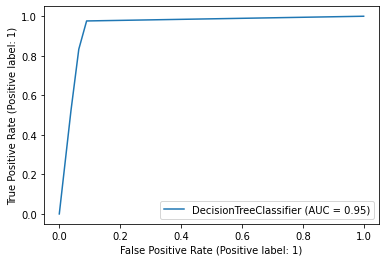

In [19]:
acc = accuracy_score(y_test, pred_target)
print("Test set accuracy:\n",acc)
acc = roc_auc_score(y_test,pred_target)
print("Train set auccuracy:\n",acc)
plot_roc_curve(dt, x_test, y_test)

**Visualising the Training set results**

[Text(0.5, 0.8333333333333334, 'X[1] <= 44.5\ngini = 0.461\nsamples = 280\nvalue = [179, 101]'),
 Text(0.25, 0.5, 'X[2] <= 89500.0\ngini = 0.285\nsamples = 203\nvalue = [168, 35]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.08\nsamples = 167\nvalue = [160, 7]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.346\nsamples = 36\nvalue = [8, 28]'),
 Text(0.75, 0.5, 'X[1] <= 46.5\ngini = 0.245\nsamples = 77\nvalue = [11, 66]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.19\nsamples = 66\nvalue = [7, 59]')]

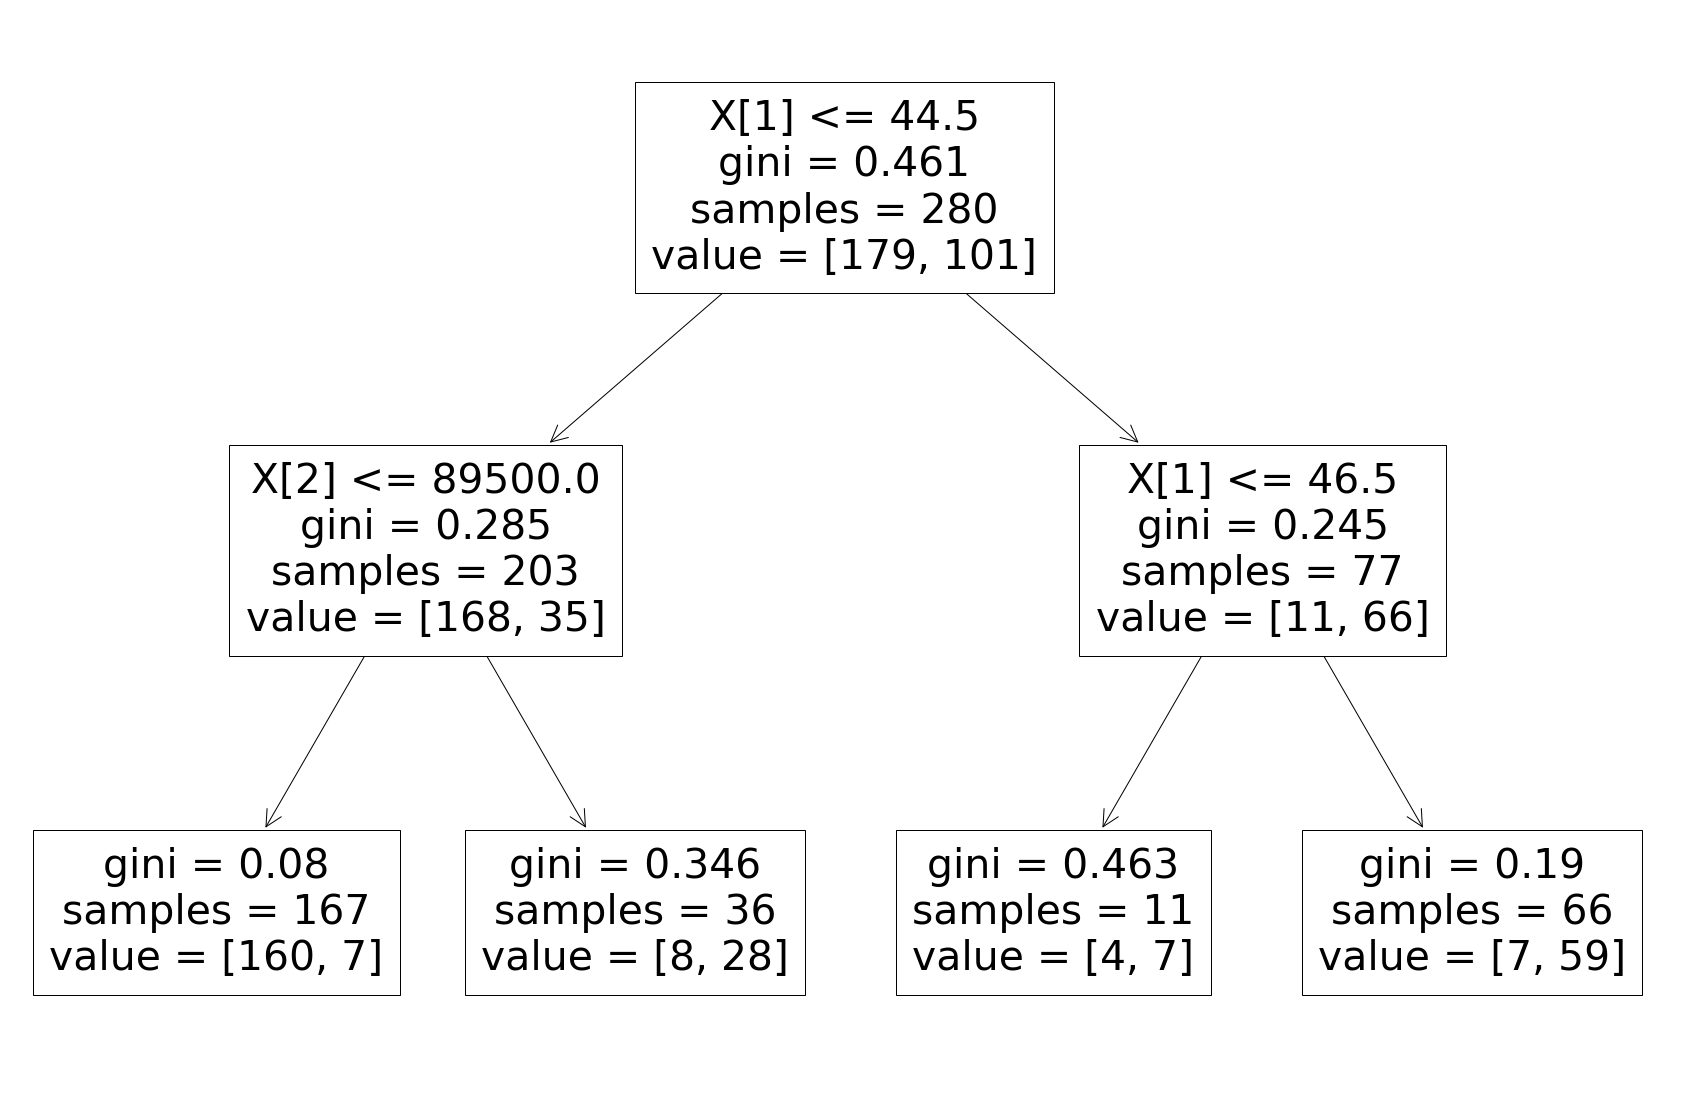

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
from sklearn import tree
tree.plot_tree(dt.fit(x_train, y_train)) 

In [24]:
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) 

  dt.fit(x_train, y_train)
  trainAccuracy = accuracy_score(y_train, dt.predict(x_train)) 
  dt = DecisionTreeClassifier(max_depth=depth) 
  valAccuracy = cross_val_score(dt,features,target, cv=10) 
  print(depth, trainAccuracy, np.mean(valAccuracy))


1 0.8357142857142857 0.825
2 0.9071428571428571 0.8949999999999999
3 0.9071428571428571 0.85
4 0.9285714285714286 0.8724999999999999
5 0.9428571428571428 0.8775000000000001
6 0.9607142857142857 0.8625
7 0.975 0.8625
8 0.9857142857142858 0.85
9 0.9964285714285714 0.845
10 1.0 0.8474999999999999
20 1.0 0.835
40 1.0 0.845
60 1.0 0.8400000000000001


**Visualising the Test set results**

[Text(0.4625, 0.9285714285714286, 'X[1] <= 42.5\ngini = 0.455\nsamples = 120\nvalue = [78, 42]'),
 Text(0.25, 0.7857142857142857, 'X[2] <= 93000.0\ngini = 0.257\nsamples = 86\nvalue = [73, 13]'),
 Text(0.1, 0.6428571428571429, 'X[1] <= 36.5\ngini = 0.027\nsamples = 73\nvalue = [72, 1]'),
 Text(0.05, 0.5, 'gini = 0.0\nsamples = 52\nvalue = [52, 0]'),
 Text(0.15, 0.5, 'X[1] <= 37.5\ngini = 0.091\nsamples = 21\nvalue = [20, 1]'),
 Text(0.1, 0.35714285714285715, 'X[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.05, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.15, 0.21428571428571427, 'X[2] <= 72500.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2, 0.35714285714285715, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(0.4, 0.6428571428571429, 'X[2] <= 110000.0\ngini = 0.142\nsamples = 13\

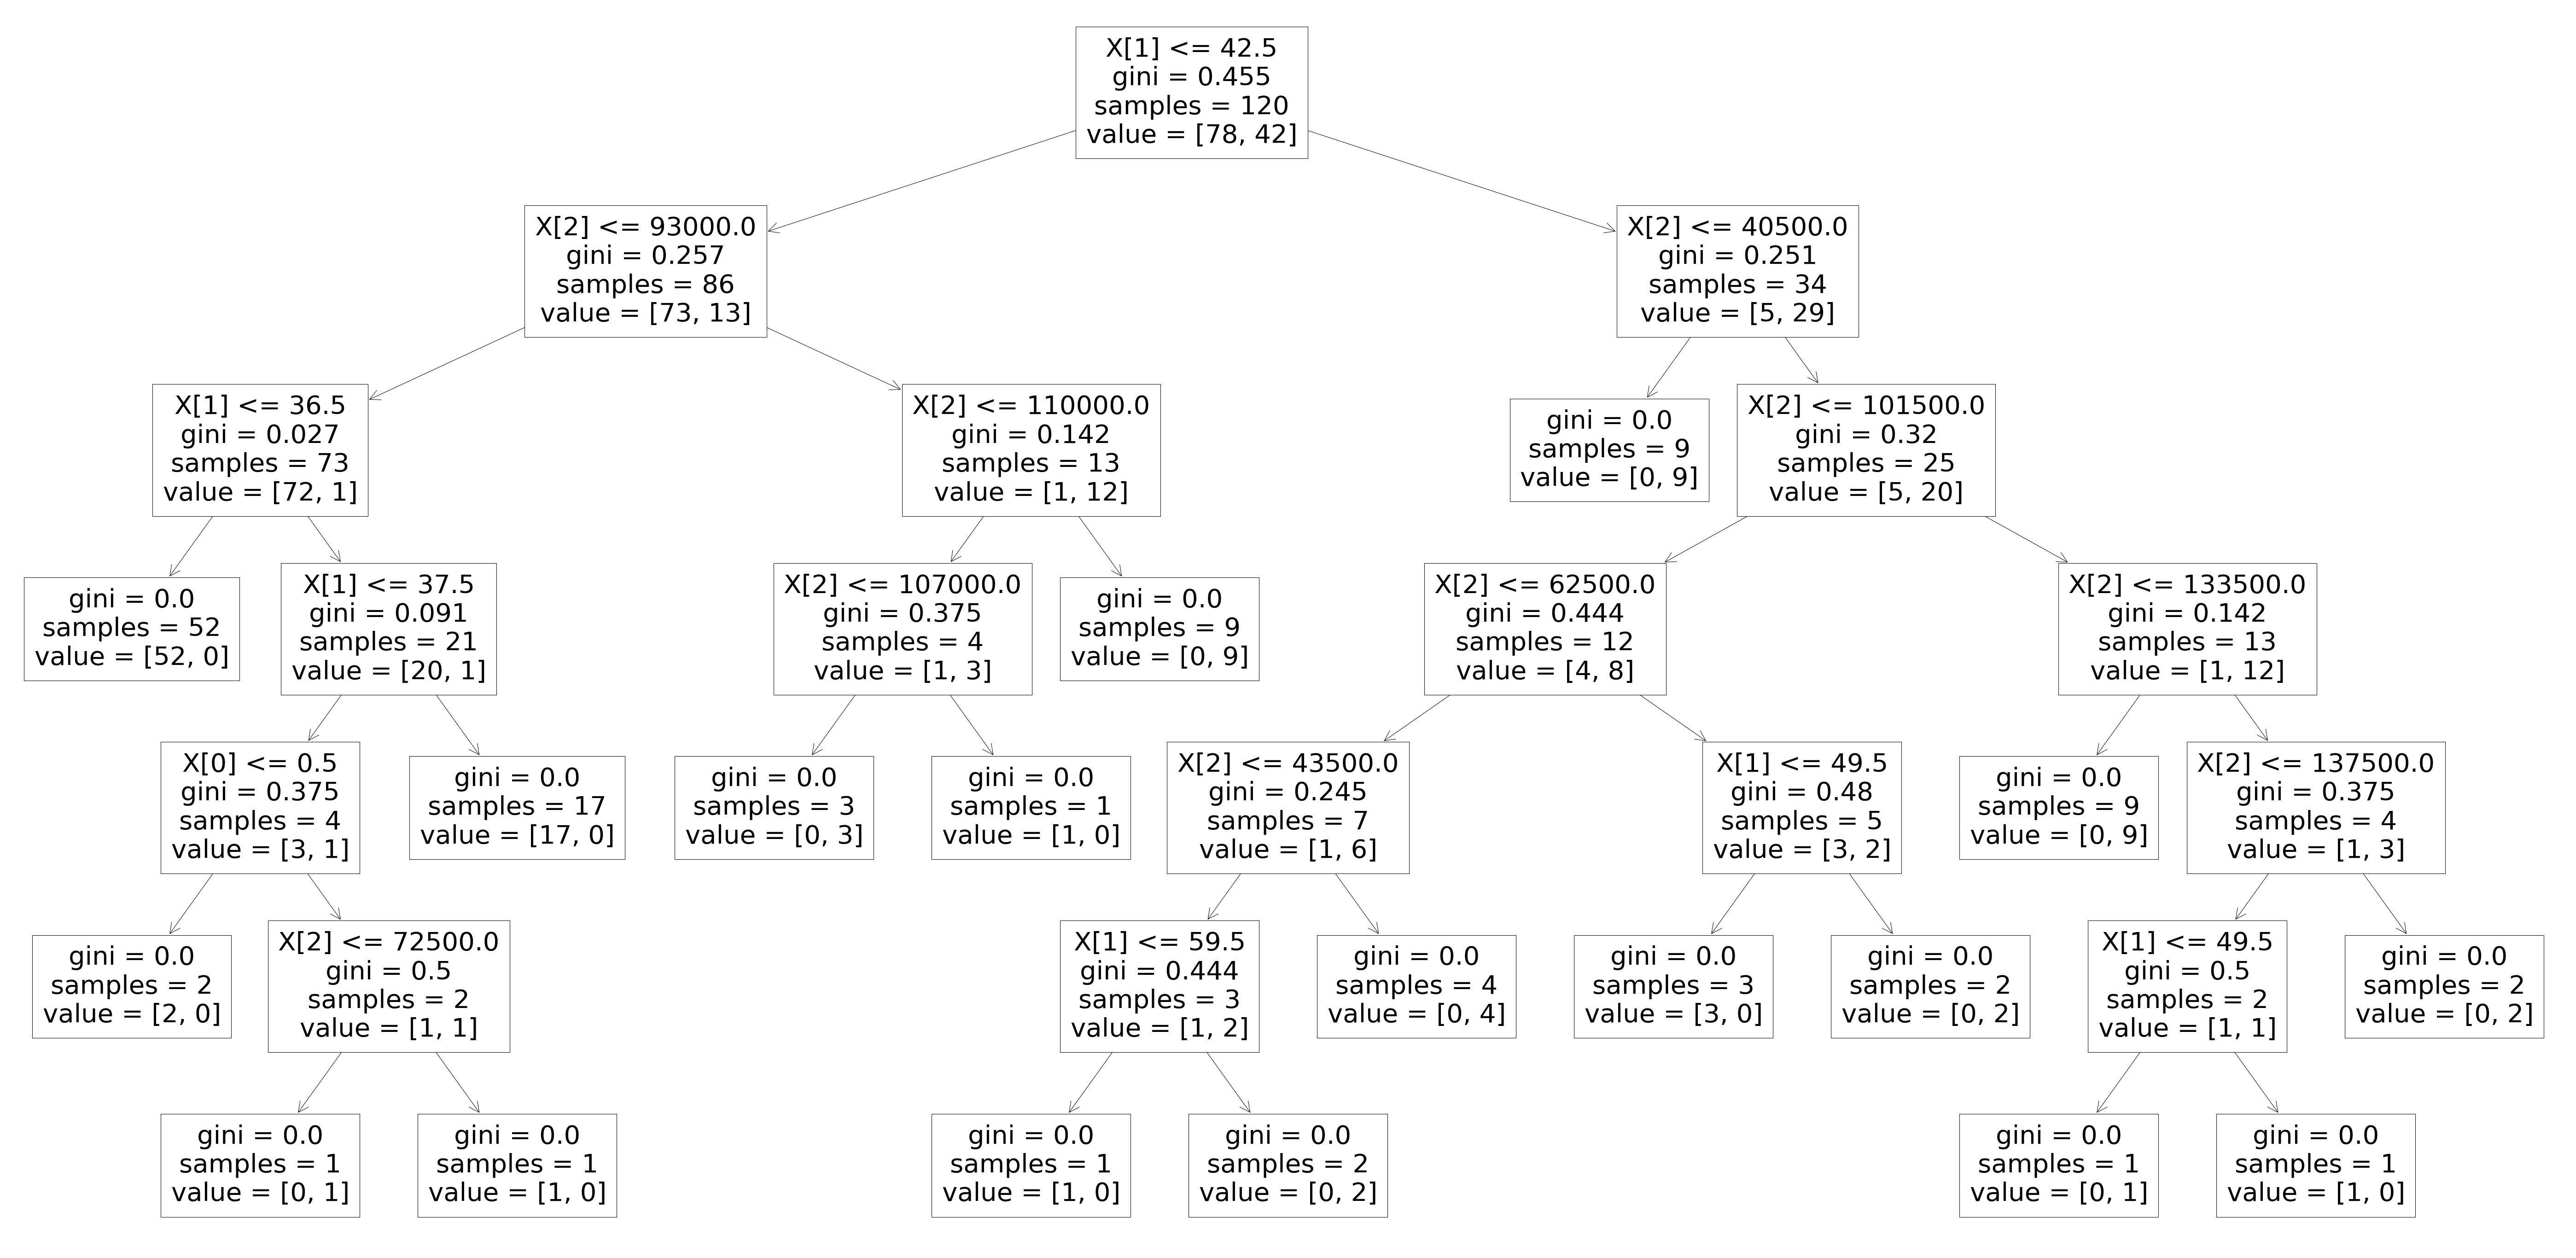

In [26]:
import matplotlib.pyplot as plt
plt.figure(figsize=(100,50))
from sklearn import tree
tree.plot_tree(dt.fit(x_test, y_test)) 